## 빨간공 2, 파란공2, 노란공 4개를 나열하는 염주순열의 수는?
- 수업중 질문을 검증해 봄

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
def make_circle(colorlist):
    """입력: 색깔 8개의 각 첫글자로 이루어진 리스트
       출력: 염주로 그림.
    """
    theta = np.array([(2*np.pi/8)*i for i in range(8)])
    r = np.array([1]*8) 
    ar =np.array([400]*8) #area
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.scatter(theta, r,s=ar, c=colorlist,cmap='hsv', alpha=0.75)
    

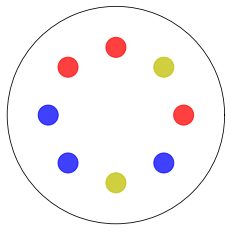

In [3]:
make_circle(['r','y','r','r','b','b','y','b'])

In [4]:
balls = 'rrbbyyyy'
# balls="rbyk"

In [5]:
# 같은 것이 있는 순열로 만들기
ball_perm = set(itertools.permutations(balls))

In [6]:
len(ball_perm)  #2*7*6*5=420 , 총 420개 

420

In [7]:
def next_pe(mylist):
    """한칸씩 오른쪽으로 밀기"""
    return [mylist[-1]]+mylist[:-1]

In [8]:
next_pe(['a','b','c'])

['c', 'a', 'b']

In [9]:
def dis(a,b):
    """
    입력: 두개의 리스트
    출력: 염주순열로 같으면 True, 다르면 False
    """
    temp=a[:]
    for i in range(len(a)):
#         print("temp:",temp,"b",b)
        if temp==b:
            return True
        else:
            temp = next_pe(temp)
    temp2=a[::-1]
    for j in range(len(a)):
        if temp2==b:
            return True
        else:
            temp2 = next_pe(temp2)
    
    
    return False
            

In [10]:
dis(['a','b','c',"d"],['d','c','b','a']) # 염주순열로 같은것

True

In [11]:
dis(['a','b','d',"c"],['d','c','b','a']) # 염주순열로 다른것

False

In [12]:
dis(['k', 'r', 'b', 'y'],['r', 'k', 'y', 'b']) #염주순열로 같은 것

True

In [13]:
ball_perm_list =list(ball_perm)
ball_perm_list2=[list(i) for i in ball_perm_list] # 리스트의 원소를 모두 리스트로 변환
ball_perm_list2[0]


['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y']

In [14]:
def diff(first, second):
#         리스트의 차이를 리스트로 만들어 출력, 마치 차집합 처럼.
        return [item for item in first if item not in second]

In [15]:
def makelist(mylist):
    """입력 :리스트
    리스트의 첫번째 원소와 동치류에 있는 것들을 리스트A로 만듦. 
    그리고 이 리스트를 원래 리스트에서 제외한 리스트B를 만듦.
    출력: B, A"""
    listA, listB=[],[]
    first_el=mylist[0]
    listA.append(first_el)
    for i in mylist[1:]:
        if dis(i,first_el):
            listA.append(i)
    listB = diff(mylist,listA)
    return listB,listA

In [16]:
makelist(ball_perm_list2)[1]

[['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y'],
 ['b', 'y', 'y', 'y', 'b', 'y', 'r', 'r'],
 ['b', 'y', 'y', 'y', 'b', 'r', 'r', 'y'],
 ['b', 'r', 'r', 'y', 'b', 'y', 'y', 'y'],
 ['y', 'b', 'y', 'y', 'y', 'b', 'r', 'r'],
 ['r', 'b', 'y', 'y', 'y', 'b', 'y', 'r'],
 ['y', 'b', 'y', 'r', 'r', 'b', 'y', 'y'],
 ['y', 'y', 'y', 'b', 'r', 'r', 'y', 'b'],
 ['y', 'y', 'y', 'b', 'y', 'r', 'r', 'b'],
 ['r', 'r', 'y', 'b', 'y', 'y', 'y', 'b'],
 ['y', 'b', 'r', 'r', 'y', 'b', 'y', 'y'],
 ['r', 'y', 'b', 'y', 'y', 'y', 'b', 'r'],
 ['b', 'y', 'r', 'r', 'b', 'y', 'y', 'y'],
 ['y', 'y', 'b', 'y', 'r', 'r', 'b', 'y'],
 ['y', 'y', 'b', 'r', 'r', 'y', 'b', 'y'],
 ['y', 'r', 'r', 'b', 'y', 'y', 'y', 'b']]

In [17]:
myresult={} # index: 염주순열로 같은 것끼리 모은 리스트
mynum ={}   # index: 같은 것의 개수
temp = ball_perm_list2

for i in range(1,420):
    try:
        print("{}:{}".format(i,makelist(temp)[1]))
        myresult[i]= makelist(temp)[1]
        mynum[i]= len(makelist(temp)[1])
        temp = makelist(temp)[0]
    except:
        break
    
    
    
    

1:[['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y'], ['b', 'y', 'y', 'y', 'b', 'y', 'r', 'r'], ['b', 'y', 'y', 'y', 'b', 'r', 'r', 'y'], ['b', 'r', 'r', 'y', 'b', 'y', 'y', 'y'], ['y', 'b', 'y', 'y', 'y', 'b', 'r', 'r'], ['r', 'b', 'y', 'y', 'y', 'b', 'y', 'r'], ['y', 'b', 'y', 'r', 'r', 'b', 'y', 'y'], ['y', 'y', 'y', 'b', 'r', 'r', 'y', 'b'], ['y', 'y', 'y', 'b', 'y', 'r', 'r', 'b'], ['r', 'r', 'y', 'b', 'y', 'y', 'y', 'b'], ['y', 'b', 'r', 'r', 'y', 'b', 'y', 'y'], ['r', 'y', 'b', 'y', 'y', 'y', 'b', 'r'], ['b', 'y', 'r', 'r', 'b', 'y', 'y', 'y'], ['y', 'y', 'b', 'y', 'r', 'r', 'b', 'y'], ['y', 'y', 'b', 'r', 'r', 'y', 'b', 'y'], ['y', 'r', 'r', 'b', 'y', 'y', 'y', 'b']]
2:[['y', 'y', 'y', 'r', 'r', 'y', 'b', 'b'], ['r', 'y', 'b', 'b', 'y', 'y', 'y', 'r'], ['r', 'r', 'y', 'y', 'y', 'b', 'b', 'y'], ['y', 'b', 'b', 'y', 'r', 'r', 'y', 'y'], ['b', 'y', 'r', 'r', 'y', 'y', 'y', 'b'], ['r', 'r', 'y', 'b', 'b', 'y', 'y', 'y'], ['y', 'y', 'r', 'r', 'y', 'b', 'b', 'y'], ['y', 'b', 'b', 'y', 'y', 'y

In [18]:
mynum

{1: 16,
 2: 16,
 3: 16,
 4: 16,
 5: 16,
 6: 16,
 7: 16,
 8: 16,
 9: 8,
 10: 16,
 11: 16,
 12: 16,
 13: 8,
 14: 8,
 15: 16,
 16: 4,
 17: 16,
 18: 16,
 19: 8,
 20: 8,
 21: 16,
 22: 16,
 23: 8,
 24: 16,
 25: 8,
 26: 16,
 27: 8,
 28: 16,
 29: 8,
 30: 16,
 31: 8,
 32: 8,
 33: 8}

**결과해석**: 총 33개의 염주순열을 가진다. 이때 원래 직순열에서 4개, 8개, 16개가 하나의 염주순열로 바뀐다.

In [19]:
mynum.values()

dict_values([16, 16, 16, 16, 16, 16, 16, 16, 8, 16, 16, 16, 8, 8, 16, 4, 16, 16, 8, 8, 16, 16, 8, 16, 8, 16, 8, 16, 8, 16, 8, 8, 8])

In [20]:
from collections import Counter
Counter(_)

Counter({16: 20, 8: 12, 4: 1})

**결과해석**: 16개 묶음이 20개, 8개 묶음이 12개, 4개 묶음이 1개 

In [21]:
sum(mynum.values())

420

In [22]:
myresult

{1: [['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y'],
  ['b', 'y', 'y', 'y', 'b', 'y', 'r', 'r'],
  ['b', 'y', 'y', 'y', 'b', 'r', 'r', 'y'],
  ['b', 'r', 'r', 'y', 'b', 'y', 'y', 'y'],
  ['y', 'b', 'y', 'y', 'y', 'b', 'r', 'r'],
  ['r', 'b', 'y', 'y', 'y', 'b', 'y', 'r'],
  ['y', 'b', 'y', 'r', 'r', 'b', 'y', 'y'],
  ['y', 'y', 'y', 'b', 'r', 'r', 'y', 'b'],
  ['y', 'y', 'y', 'b', 'y', 'r', 'r', 'b'],
  ['r', 'r', 'y', 'b', 'y', 'y', 'y', 'b'],
  ['y', 'b', 'r', 'r', 'y', 'b', 'y', 'y'],
  ['r', 'y', 'b', 'y', 'y', 'y', 'b', 'r'],
  ['b', 'y', 'r', 'r', 'b', 'y', 'y', 'y'],
  ['y', 'y', 'b', 'y', 'r', 'r', 'b', 'y'],
  ['y', 'y', 'b', 'r', 'r', 'y', 'b', 'y'],
  ['y', 'r', 'r', 'b', 'y', 'y', 'y', 'b']],
 2: [['y', 'y', 'y', 'r', 'r', 'y', 'b', 'b'],
  ['r', 'y', 'b', 'b', 'y', 'y', 'y', 'r'],
  ['r', 'r', 'y', 'y', 'y', 'b', 'b', 'y'],
  ['y', 'b', 'b', 'y', 'r', 'r', 'y', 'y'],
  ['b', 'y', 'r', 'r', 'y', 'y', 'y', 'b'],
  ['r', 'r', 'y', 'b', 'b', 'y', 'y', 'y'],
  ['y', 'y', 'r', 'r', 'y

In [23]:
myresult[1] 

[['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y'],
 ['b', 'y', 'y', 'y', 'b', 'y', 'r', 'r'],
 ['b', 'y', 'y', 'y', 'b', 'r', 'r', 'y'],
 ['b', 'r', 'r', 'y', 'b', 'y', 'y', 'y'],
 ['y', 'b', 'y', 'y', 'y', 'b', 'r', 'r'],
 ['r', 'b', 'y', 'y', 'y', 'b', 'y', 'r'],
 ['y', 'b', 'y', 'r', 'r', 'b', 'y', 'y'],
 ['y', 'y', 'y', 'b', 'r', 'r', 'y', 'b'],
 ['y', 'y', 'y', 'b', 'y', 'r', 'r', 'b'],
 ['r', 'r', 'y', 'b', 'y', 'y', 'y', 'b'],
 ['y', 'b', 'r', 'r', 'y', 'b', 'y', 'y'],
 ['r', 'y', 'b', 'y', 'y', 'y', 'b', 'r'],
 ['b', 'y', 'r', 'r', 'b', 'y', 'y', 'y'],
 ['y', 'y', 'b', 'y', 'r', 'r', 'b', 'y'],
 ['y', 'y', 'b', 'r', 'r', 'y', 'b', 'y'],
 ['y', 'r', 'r', 'b', 'y', 'y', 'y', 'b']]

In [24]:
# 서로다른 33개 출력
for j,i in enumerate(myresult.values(),1):
    print(f"{j:2},{i[0]} --> 직순열: {mynum[j]}개")

 1,['r', 'r', 'b', 'y', 'y', 'y', 'b', 'y'] --> 직순열: 16개
 2,['y', 'y', 'y', 'r', 'r', 'y', 'b', 'b'] --> 직순열: 16개
 3,['b', 'r', 'y', 'y', 'y', 'b', 'r', 'y'] --> 직순열: 16개
 4,['y', 'r', 'b', 'y', 'r', 'y', 'y', 'b'] --> 직순열: 16개
 5,['r', 'y', 'y', 'y', 'b', 'y', 'b', 'r'] --> 직순열: 16개
 6,['y', 'y', 'y', 'r', 'y', 'b', 'b', 'r'] --> 직순열: 16개
 7,['b', 'y', 'y', 'r', 'y', 'r', 'y', 'b'] --> 직순열: 16개
 8,['r', 'b', 'b', 'y', 'y', 'y', 'r', 'y'] --> 직순열: 16개
 9,['y', 'r', 'y', 'y', 'r', 'y', 'b', 'b'] --> 직순열: 8개
10,['r', 'y', 'y', 'b', 'y', 'r', 'y', 'b'] --> 직순열: 16개
11,['b', 'r', 'r', 'y', 'y', 'b', 'y', 'y'] --> 직순열: 16개
12,['y', 'y', 'b', 'y', 'r', 'b', 'r', 'y'] --> 직순열: 16개
13,['b', 'r', 'y', 'y', 'r', 'b', 'y', 'y'] --> 직순열: 8개
14,['b', 'y', 'y', 'r', 'b', 'y', 'y', 'r'] --> 직순열: 8개
15,['y', 'b', 'y', 'b', 'y', 'y', 'r', 'r'] --> 직순열: 16개
16,['y', 'r', 'y', 'b', 'y', 'r', 'y', 'b'] --> 직순열: 4개
17,['r', 'y', 'r', 'b', 'y', 'y', 'b', 'y'] --> 직순열: 16개
18,['b', 'r', 'b', 'y', 'y', 'y', '

4개 짜리:[['r', 'b', 'y', 'b', 'r', 'y', 'y', 'y'], ['y', 'y', 'y', 'r', 'b', 'y', 'b', 'r'], ['y', 'y', 'r', 'b', 'y', 'b', 'r', 'y'], ['b', 'r', 'y', 'y', 'y', 'r', 'b', 'y'], ['r', 'y', 'y', 'y', 'r', 'b', 'y', 'b'], ['y', 'r', 'b', 'y', 'b', 'r', 'y', 'y'], ['y', 'b', 'r', 'y', 'y', 'y', 'r', 'b'], ['b', 'y', 'b', 'r', 'y', 'y', 'y', 'r']]


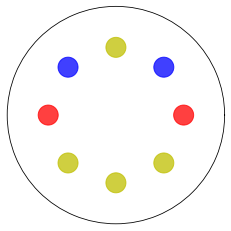

In [25]:
print(f"4개 짜리:{myresult[20]}")
make_circle(myresult[20][0]) #직순열 4개가 하나의 염주가 되는 경우 관찰

/Users/xzero/python_ex/basic_statistics/statvenv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


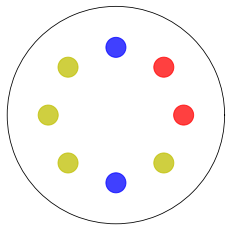

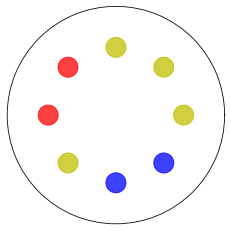

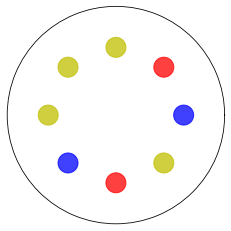

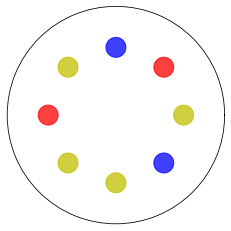

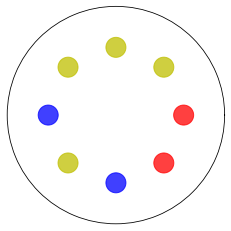

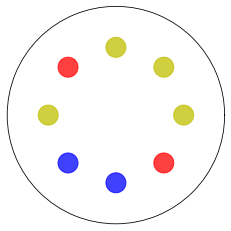

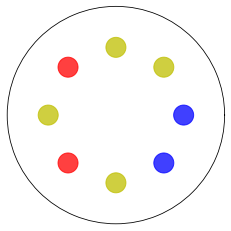

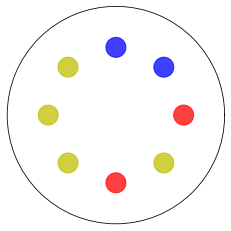

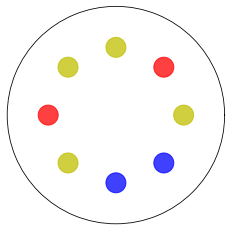

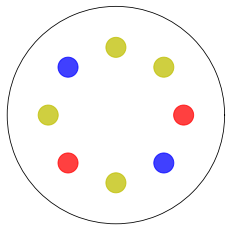

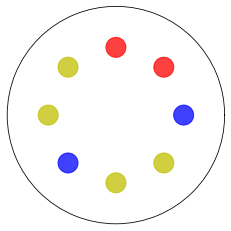

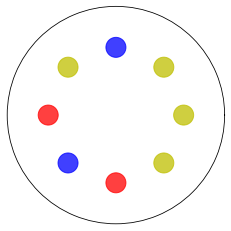

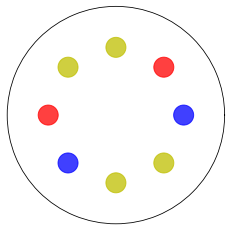

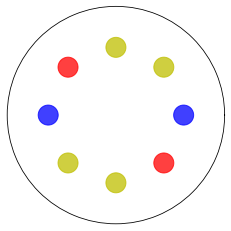

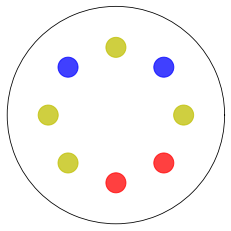

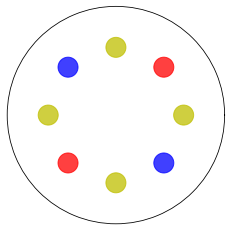

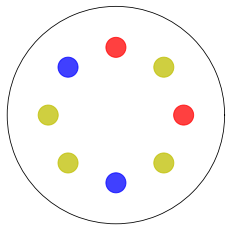

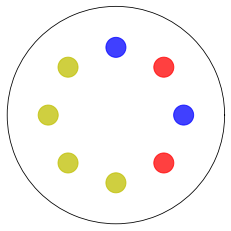

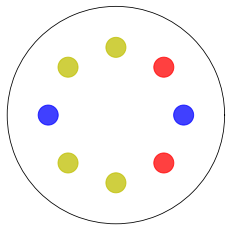

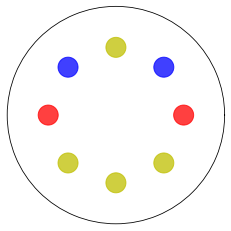

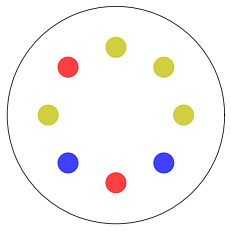

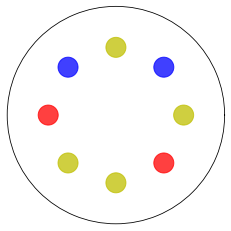

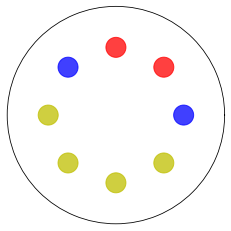

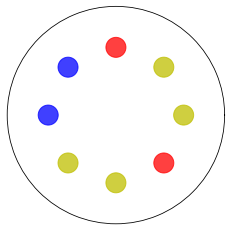

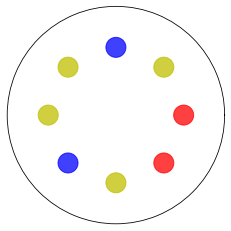

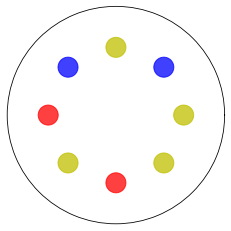

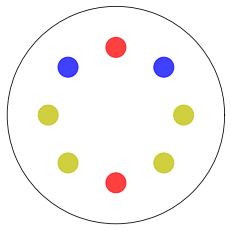

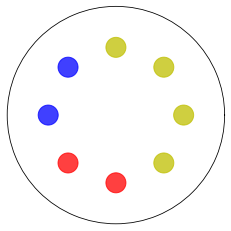

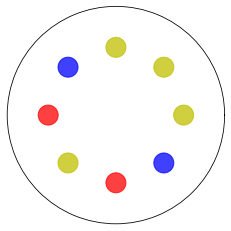

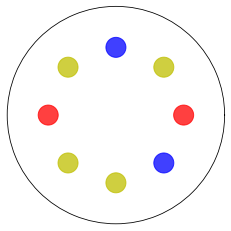

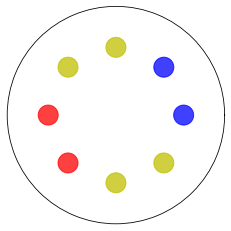

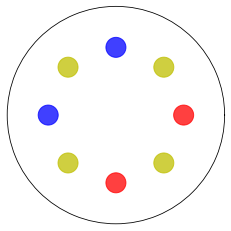

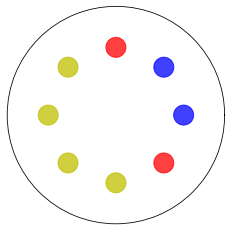

In [26]:
# 서로다른 33개 그림, 출력
for j,i in enumerate(myresult.values(),1):
    make_circle(i[0])